## Importing Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Inspecting Data

In [3]:
# Read the dataset
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Looking at the statistical aspects of dataset
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Replacing 'Select' with NaN
leads['Specialization']=leads['Specialization'].replace('Select',np.nan)
leads['How did you hear about X Education']=leads['How did you hear about X Education'].replace('Select',np.nan)
leads['Lead Profile']=leads['Lead Profile'].replace('Select',np.nan)
leads['City']=leads['City'].replace('Select',np.nan)

In [7]:
# Dropping columns with more than 40% null values
temp=(100*leads.isnull().mean()).reset_index()
temp=temp.rename(columns={"index":"Column Name",0:"% Missing Value"})
temp=temp.sort_values("% Missing Value",ascending=False)
drop_cols=list(temp[temp["% Missing Value"]>40]["Column Name"])
print(drop_cols)

['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']


In [8]:
leads=leads.drop(drop_cols,axis=1)
leads.shape

(9240, 30)

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

## Imputing Null Values

In [10]:
continuous_cols=['TotalVisits','Page Views Per Visit']
for i in continuous_cols:
    median_1=leads[i].median()
    leads[i]=leads[i].fillna(median_1)

In [11]:
categorical_cols=["Lead Source","Last Activity"]
for i in categorical_cols:
    mode_=leads[i].mode()[0]
    leads[i]=leads[i].fillna(mode_)

In [12]:
for i in continuous_cols:
    q1=leads[i].describe()["25%"] 
    q3=leads[i].describe()["75%"] 
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    leads[i]=np.where(leads[i]>upper_bound,upper_bound,leads[i])
    leads[i]=np.where(leads[i]<lower_bound,lower_bound,leads[i])

In [13]:
cont_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
cat_cols=["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Tags","Update me on Supply Chain Content","Get updates on DM Content","City","I agree to pay the amount through cheque","A free copy of Mastering The Interview","Last Notable Activity"]
target=["Converted"]
len(cont_cols)+len(cat_cols)+len(target)

28

## Univariate Analysis

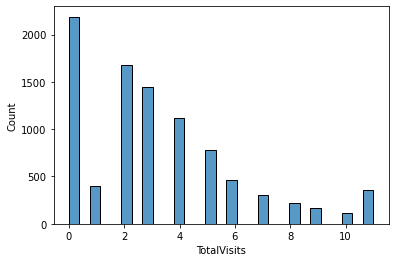

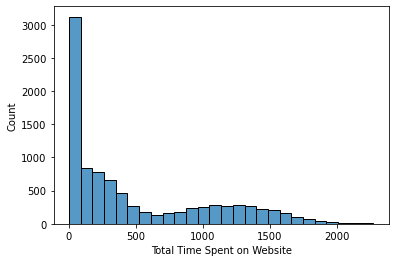

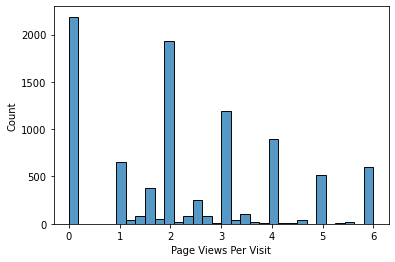

In [14]:
# histogram plots for continuous variables
for i in cont_cols:
    sns.histplot(leads[i])
    plt.show()

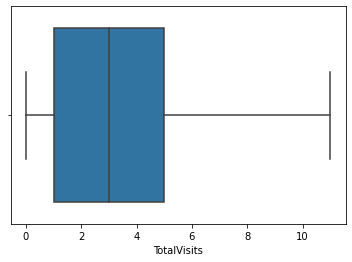

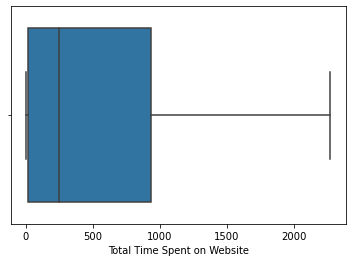

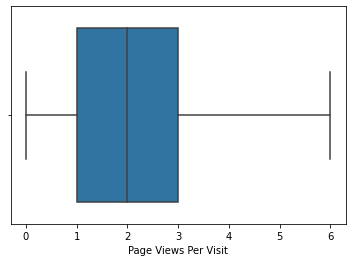

In [15]:
# box plots for continuous variables
for i in cont_cols:
    sns.boxplot(leads[i])
    plt.show()

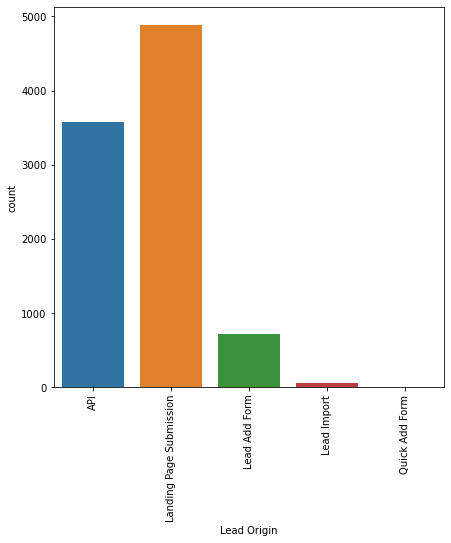

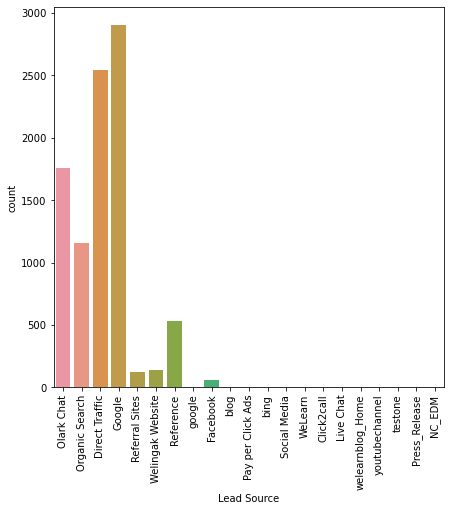

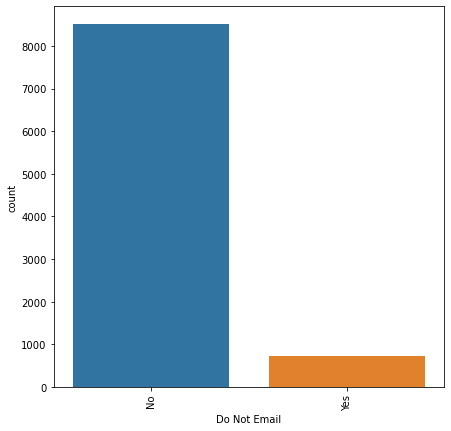

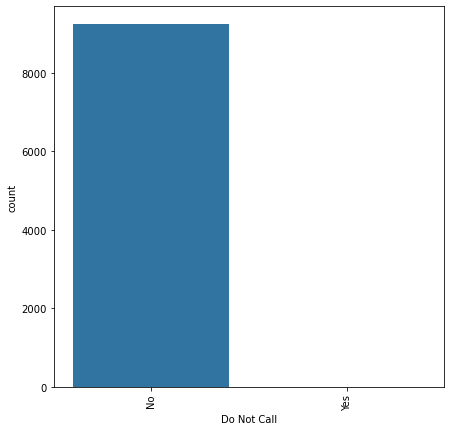

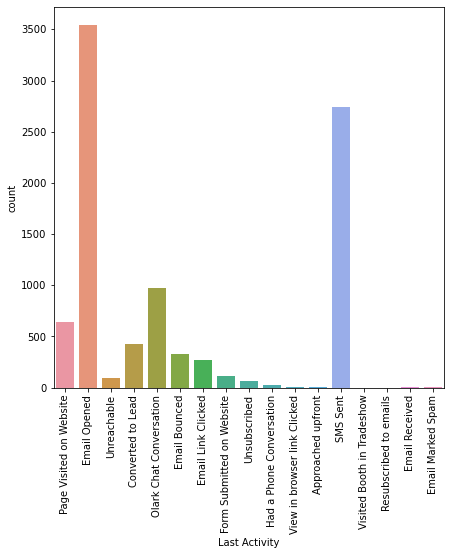

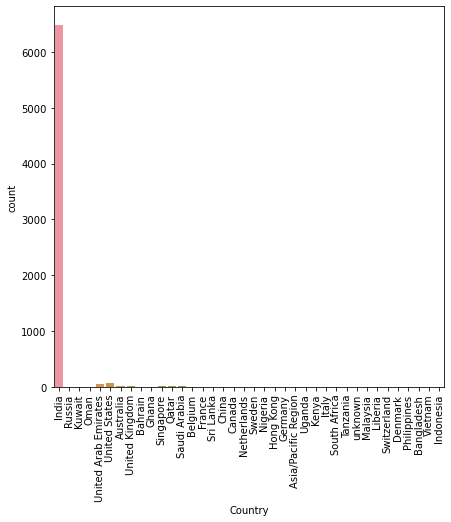

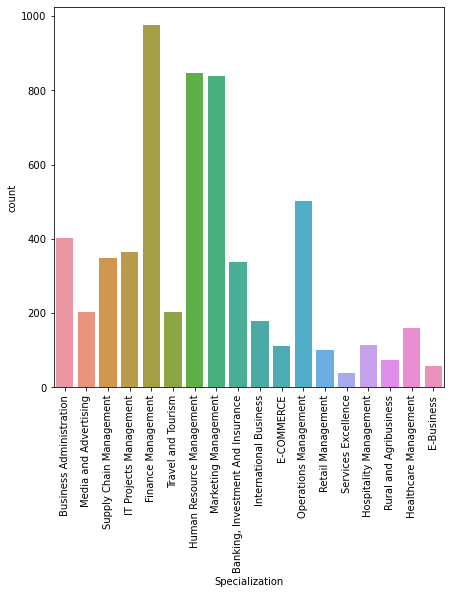

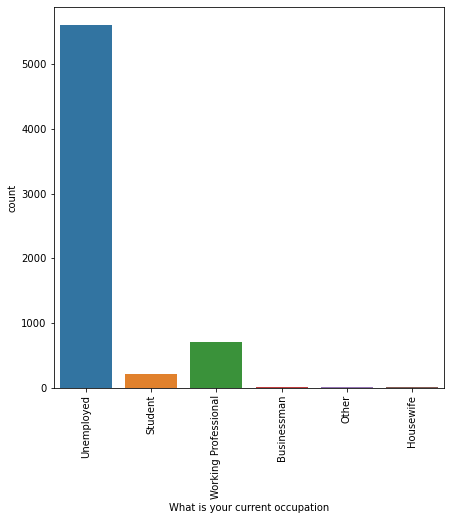

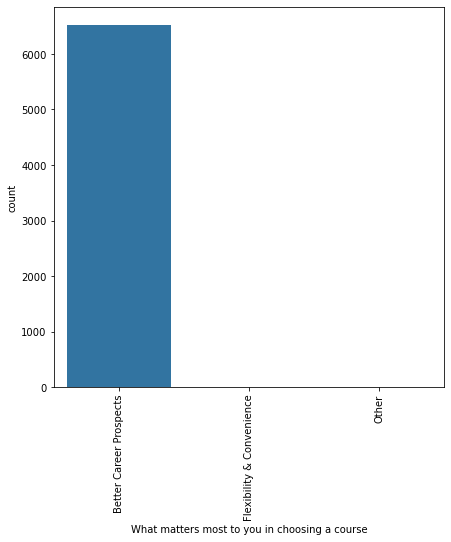

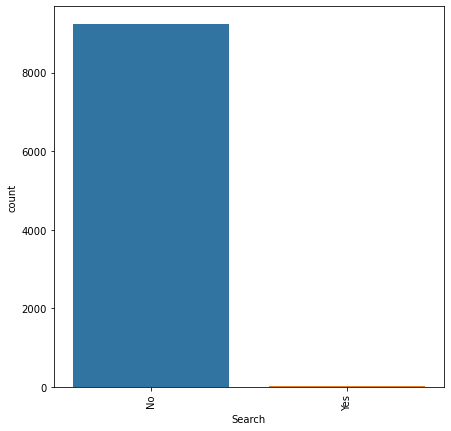

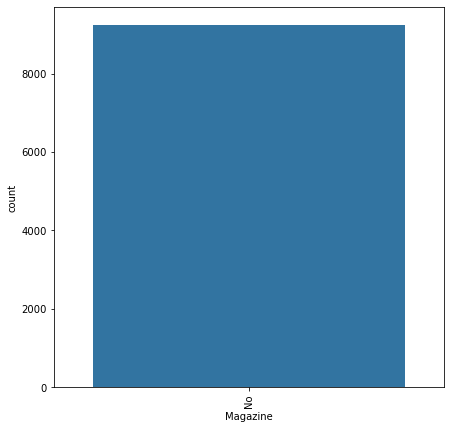

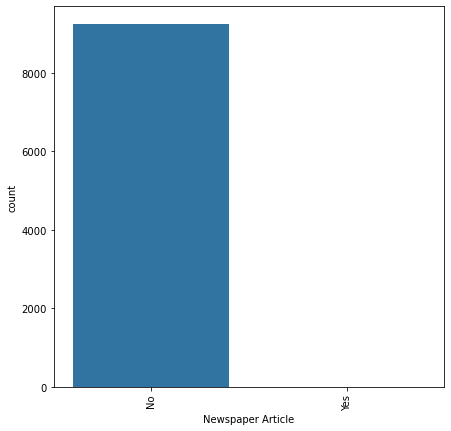

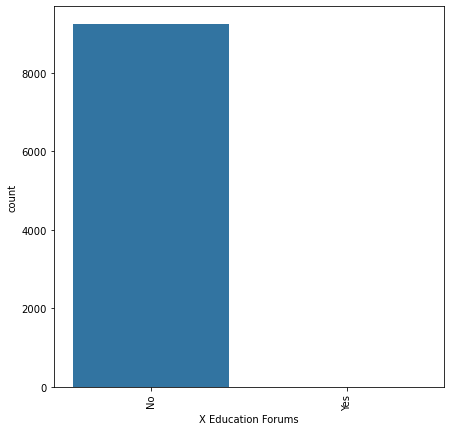

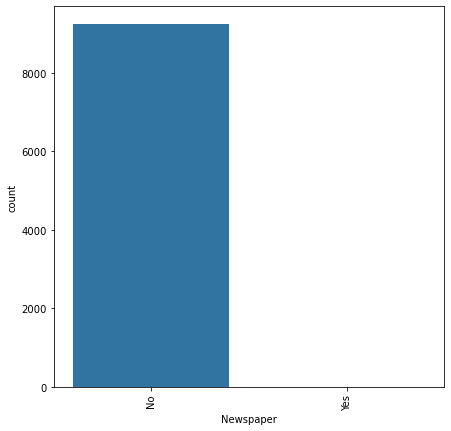

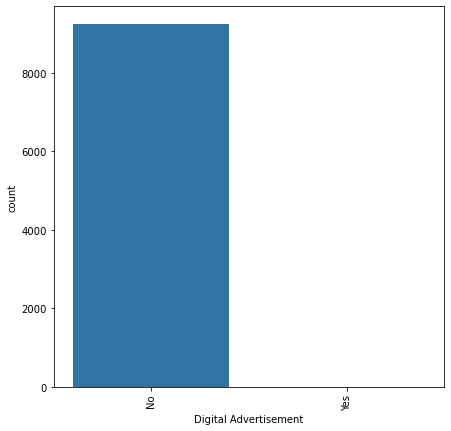

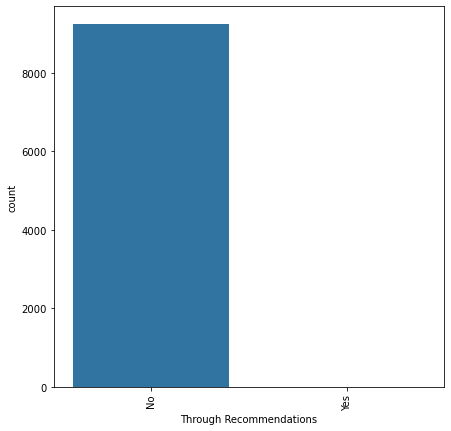

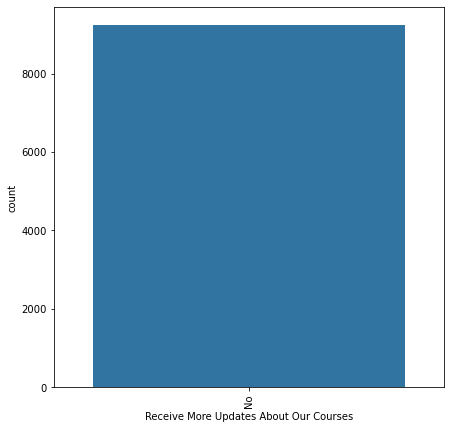

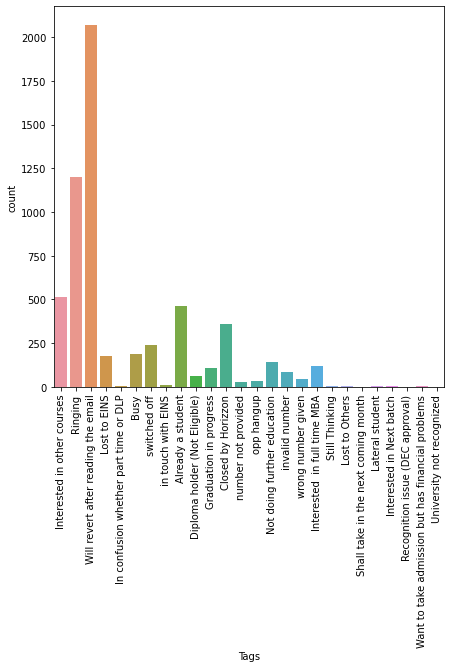

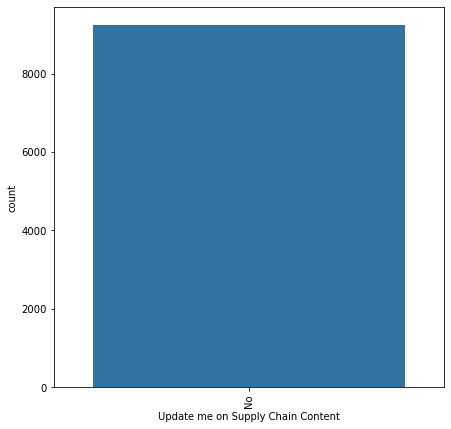

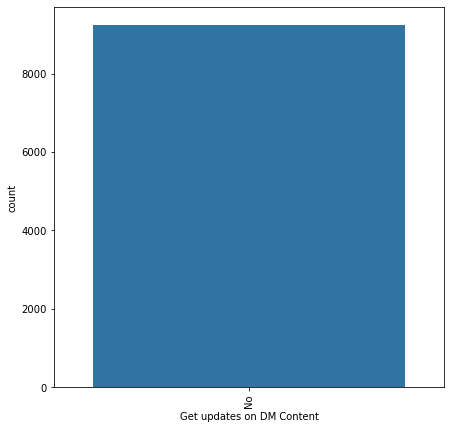

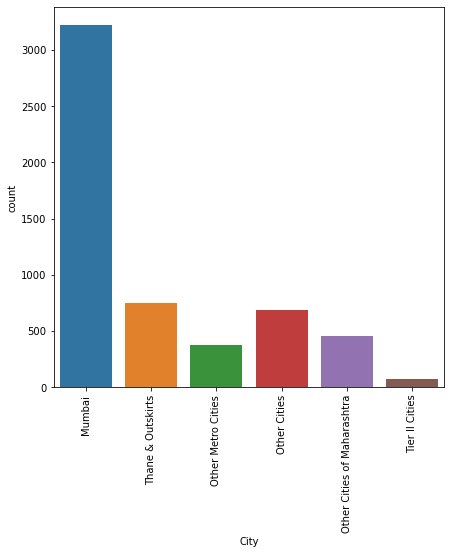

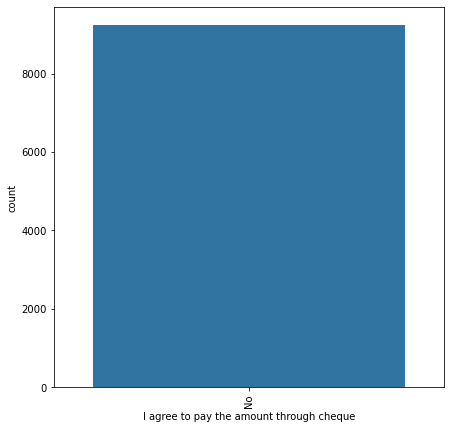

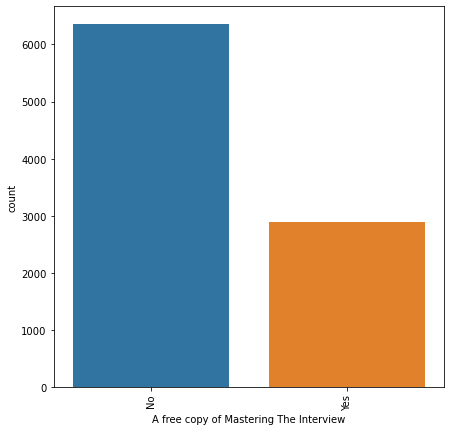

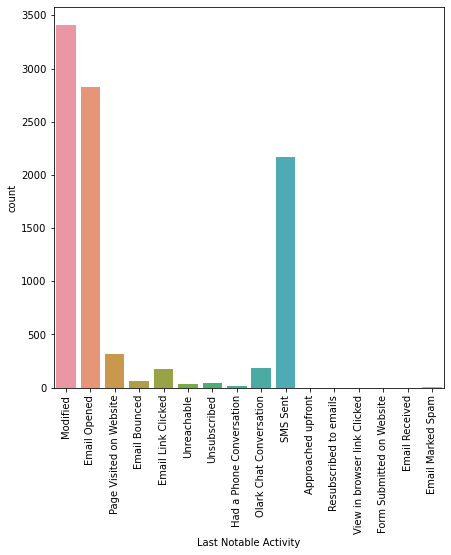

In [16]:
# count plots for categorical variables
for i in cat_cols:
    plt.figure(figsize = (7,7))
    plt.xticks(rotation=90)
    sns.countplot(leads[i])
    plt.show()

## Bivariate Analysis

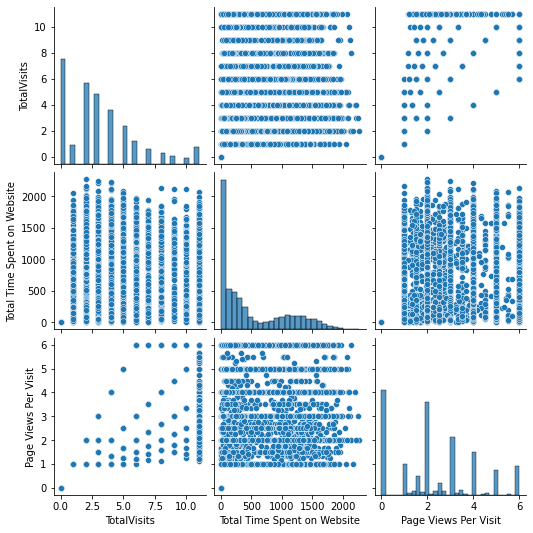

In [17]:
# pair plot for continuous variables
sns.pairplot(leads[cont_cols])

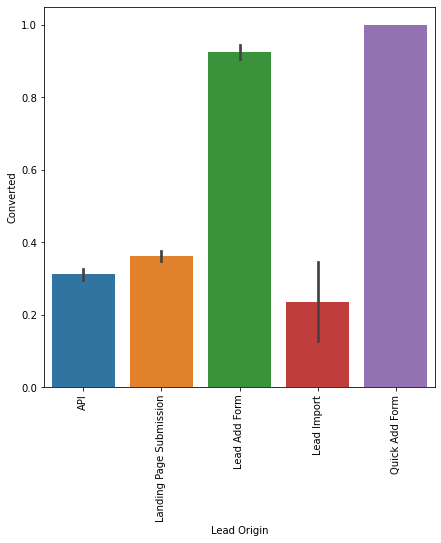

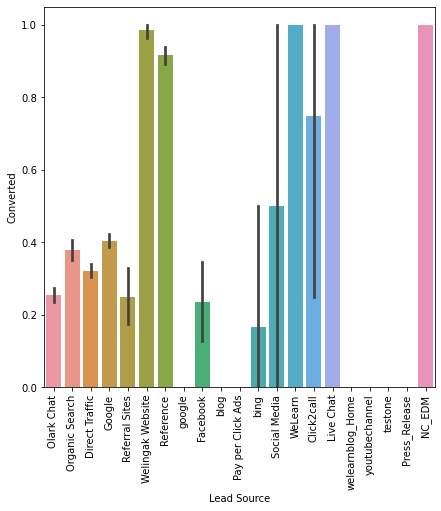

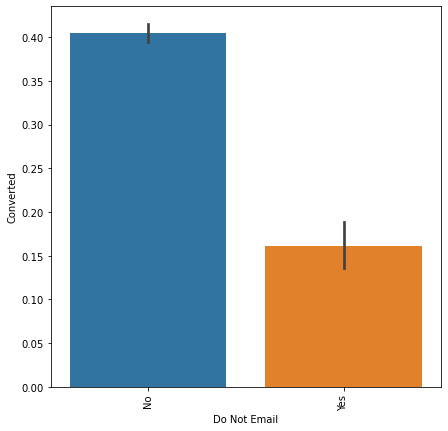

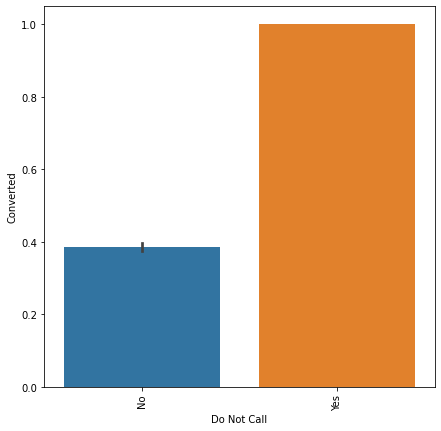

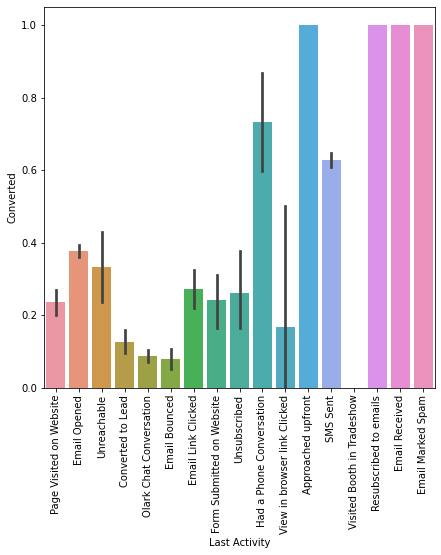

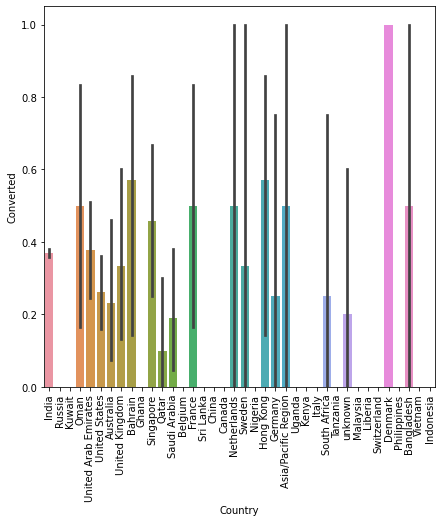

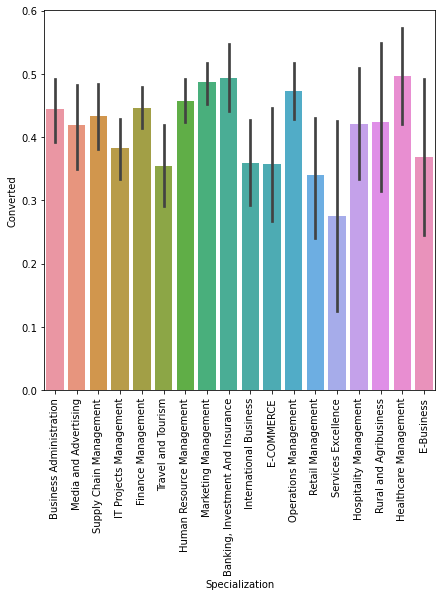

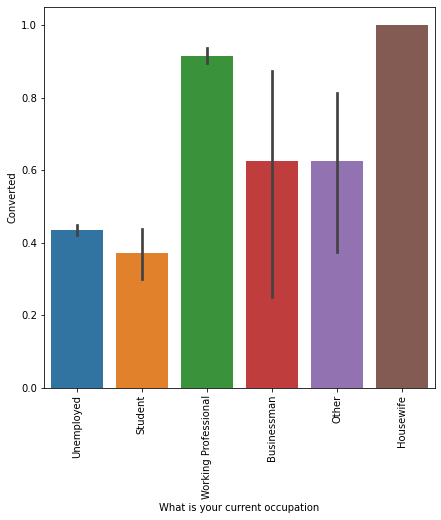

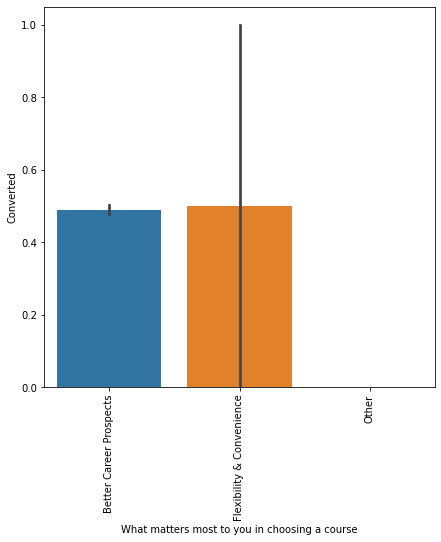

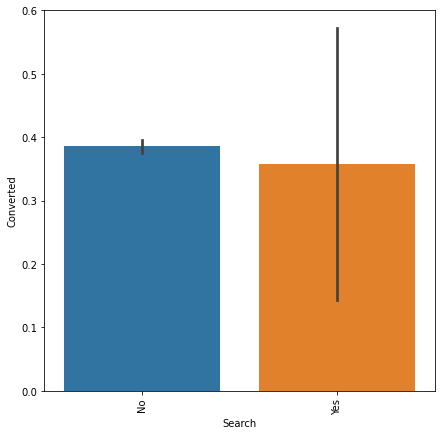

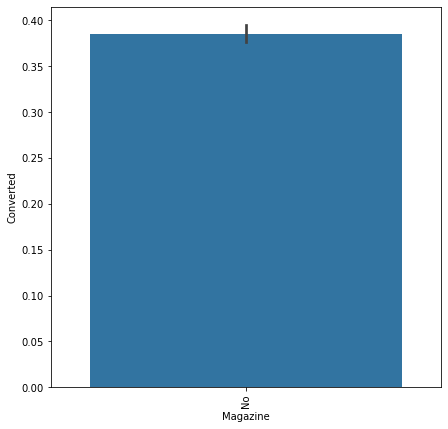

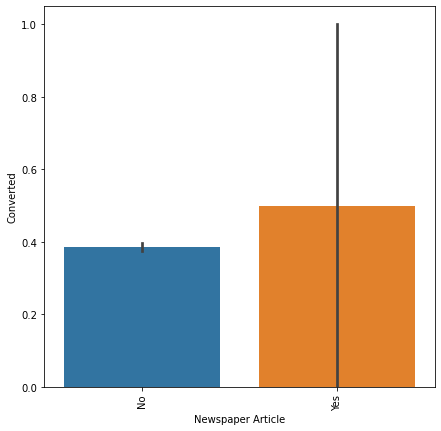

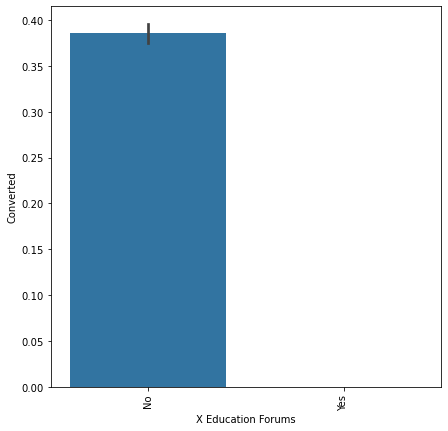

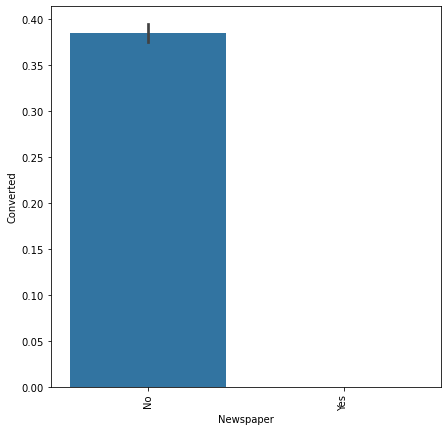

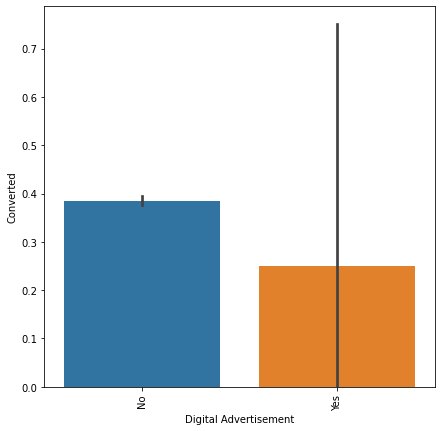

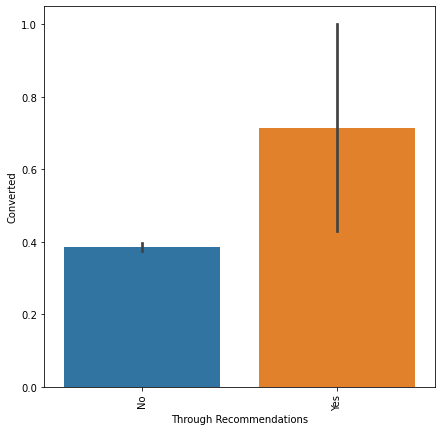

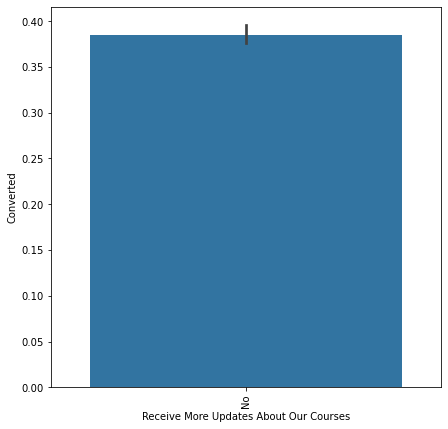

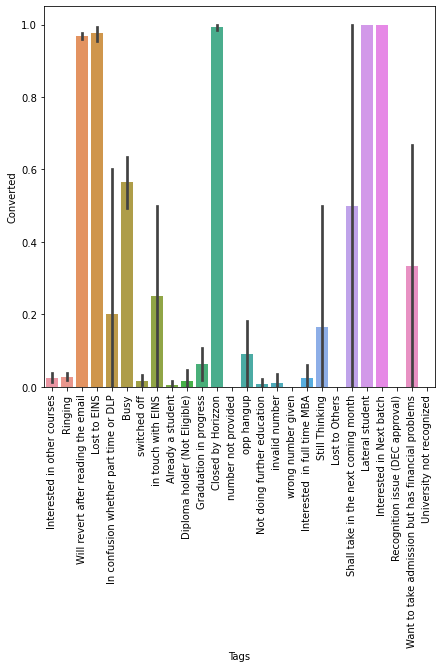

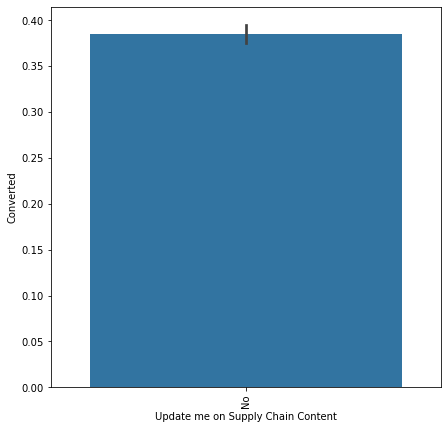

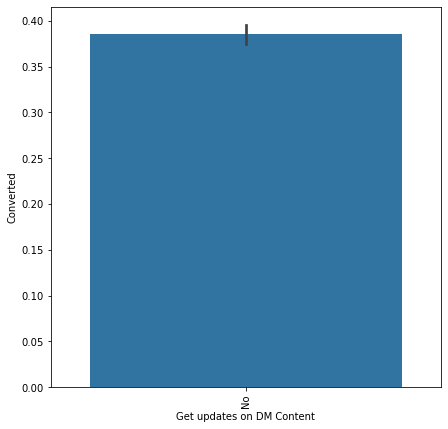

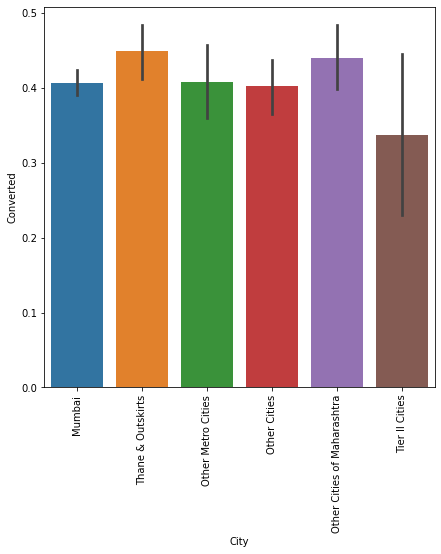

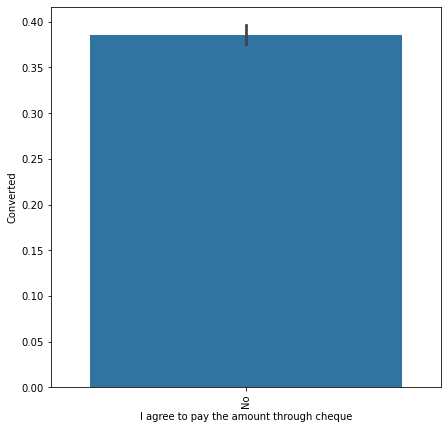

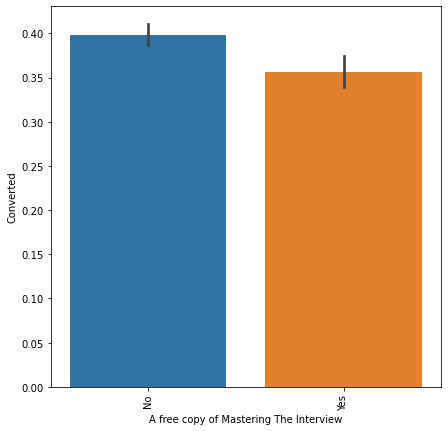

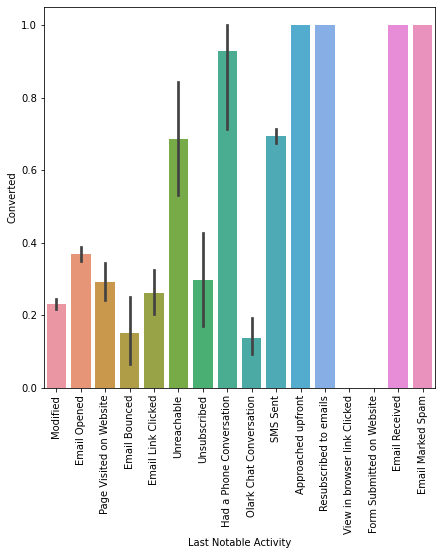

In [18]:
# scatter plot for continuous with target variable
for i in cat_cols:
    plt.figure(figsize = (7,7))
    plt.xticks(rotation=90)
    sns.barplot(leads[i],leads["Converted"])
    plt.show()

## Data Preparation

In [19]:
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads[varlist] = leads[varlist].apply(binary_map)

In [20]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [21]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

### Put the categories of categorical columns with less weightage in 'Others' category

In [22]:
leads['Lead Origin'].astype('category').value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [23]:
leads['Lead Origin']=leads['Lead Origin'].replace(['Lead Add Form','Lead Import','Quick Add Form'],'Others')

In [24]:
leads['Lead Source'].astype('category').value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
WeLearn              0.000108
Pay per Click Ads    0.000108
NC_EDM               0.000108
blog                 0.000108
testone              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
Name: Lead Source, dtype: float64

In [25]:
leads['Lead Source']=leads['Lead Source'].replace(['Reference','Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','WeLearn','Pay per Click Ads','NC_EDM','blog','testone','welearnblog_Home','youtubechannel'],'Others')

In [26]:
leads['Last Activity'].astype('category').value_counts(normalize=True)

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: Last Activity, dtype: float64

In [27]:
leads['Last Activity']=leads['Last Activity'].replace(['Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [28]:
leads['Country'].astype('category').value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Kuwait                  0.000590
Nigeria                 0.000590
South Africa            0.000590
Germany                 0.000590
Canada                  0.000590
Sweden                  0.000443
Uganda                  0.000295
Philippines             0.000295
Asia/Pacific Region     0.000295
Italy                   0.000295
Ghana                   0.000295
China                   0.000295
Belgium                 0.000295
Bangladesh              0.000295
Netherlands             0.000295
Malaysia                0.000148
Liberia                 0.000148
Russia    

In [29]:
# Drpping 'Country' as it is skewed
leads=leads.drop('Country',axis=1)

In [30]:
leads['Specialization'].astype('category').value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [31]:
leads['Specialization']=leads['Specialization'].replace(['Media and Advertising','Travel and Tourism','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],'Others')

In [32]:
# Dropping 'What is your current occupation' as it is skewed
leads=leads.drop('What is your current occupation',axis=1)

In [33]:
# Dropping 'What matters most to you in choosing a course' as it is skewed
leads=leads.drop('What matters most to you in choosing a course',axis=1)

In [34]:
leads['Tags'].astype('category').value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [35]:
leads['Tags']=leads['Tags'].replace(['Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','Interested in Next batch','In confusion whether part time or DLP','Lateral student','Shall take in the next coming month','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Others')

In [36]:
leads['Last Notable Activity'].astype('category').value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Email Received                  0.000108
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Name: Last Notable Activity, dtype: float64

In [37]:
leads['Last Notable Activity']=leads['Last Notable Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Email Received','Form Submitted on Website','Resubscribed to emails','View in browser link Clicked'],'Others')

### Dummy Variable Creation

In [38]:
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization']], drop_first=True)
dummy2=  pd.get_dummies(leads[['City','Tags','Last Notable Activity']], drop_first=True)
leads = pd.concat([leads, dummy1, dummy2], axis=1)

In [39]:
leads=leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags','City','Last Notable Activity'],1)
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [40]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through cheque    0
A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Others                

## Looking at Correlation

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

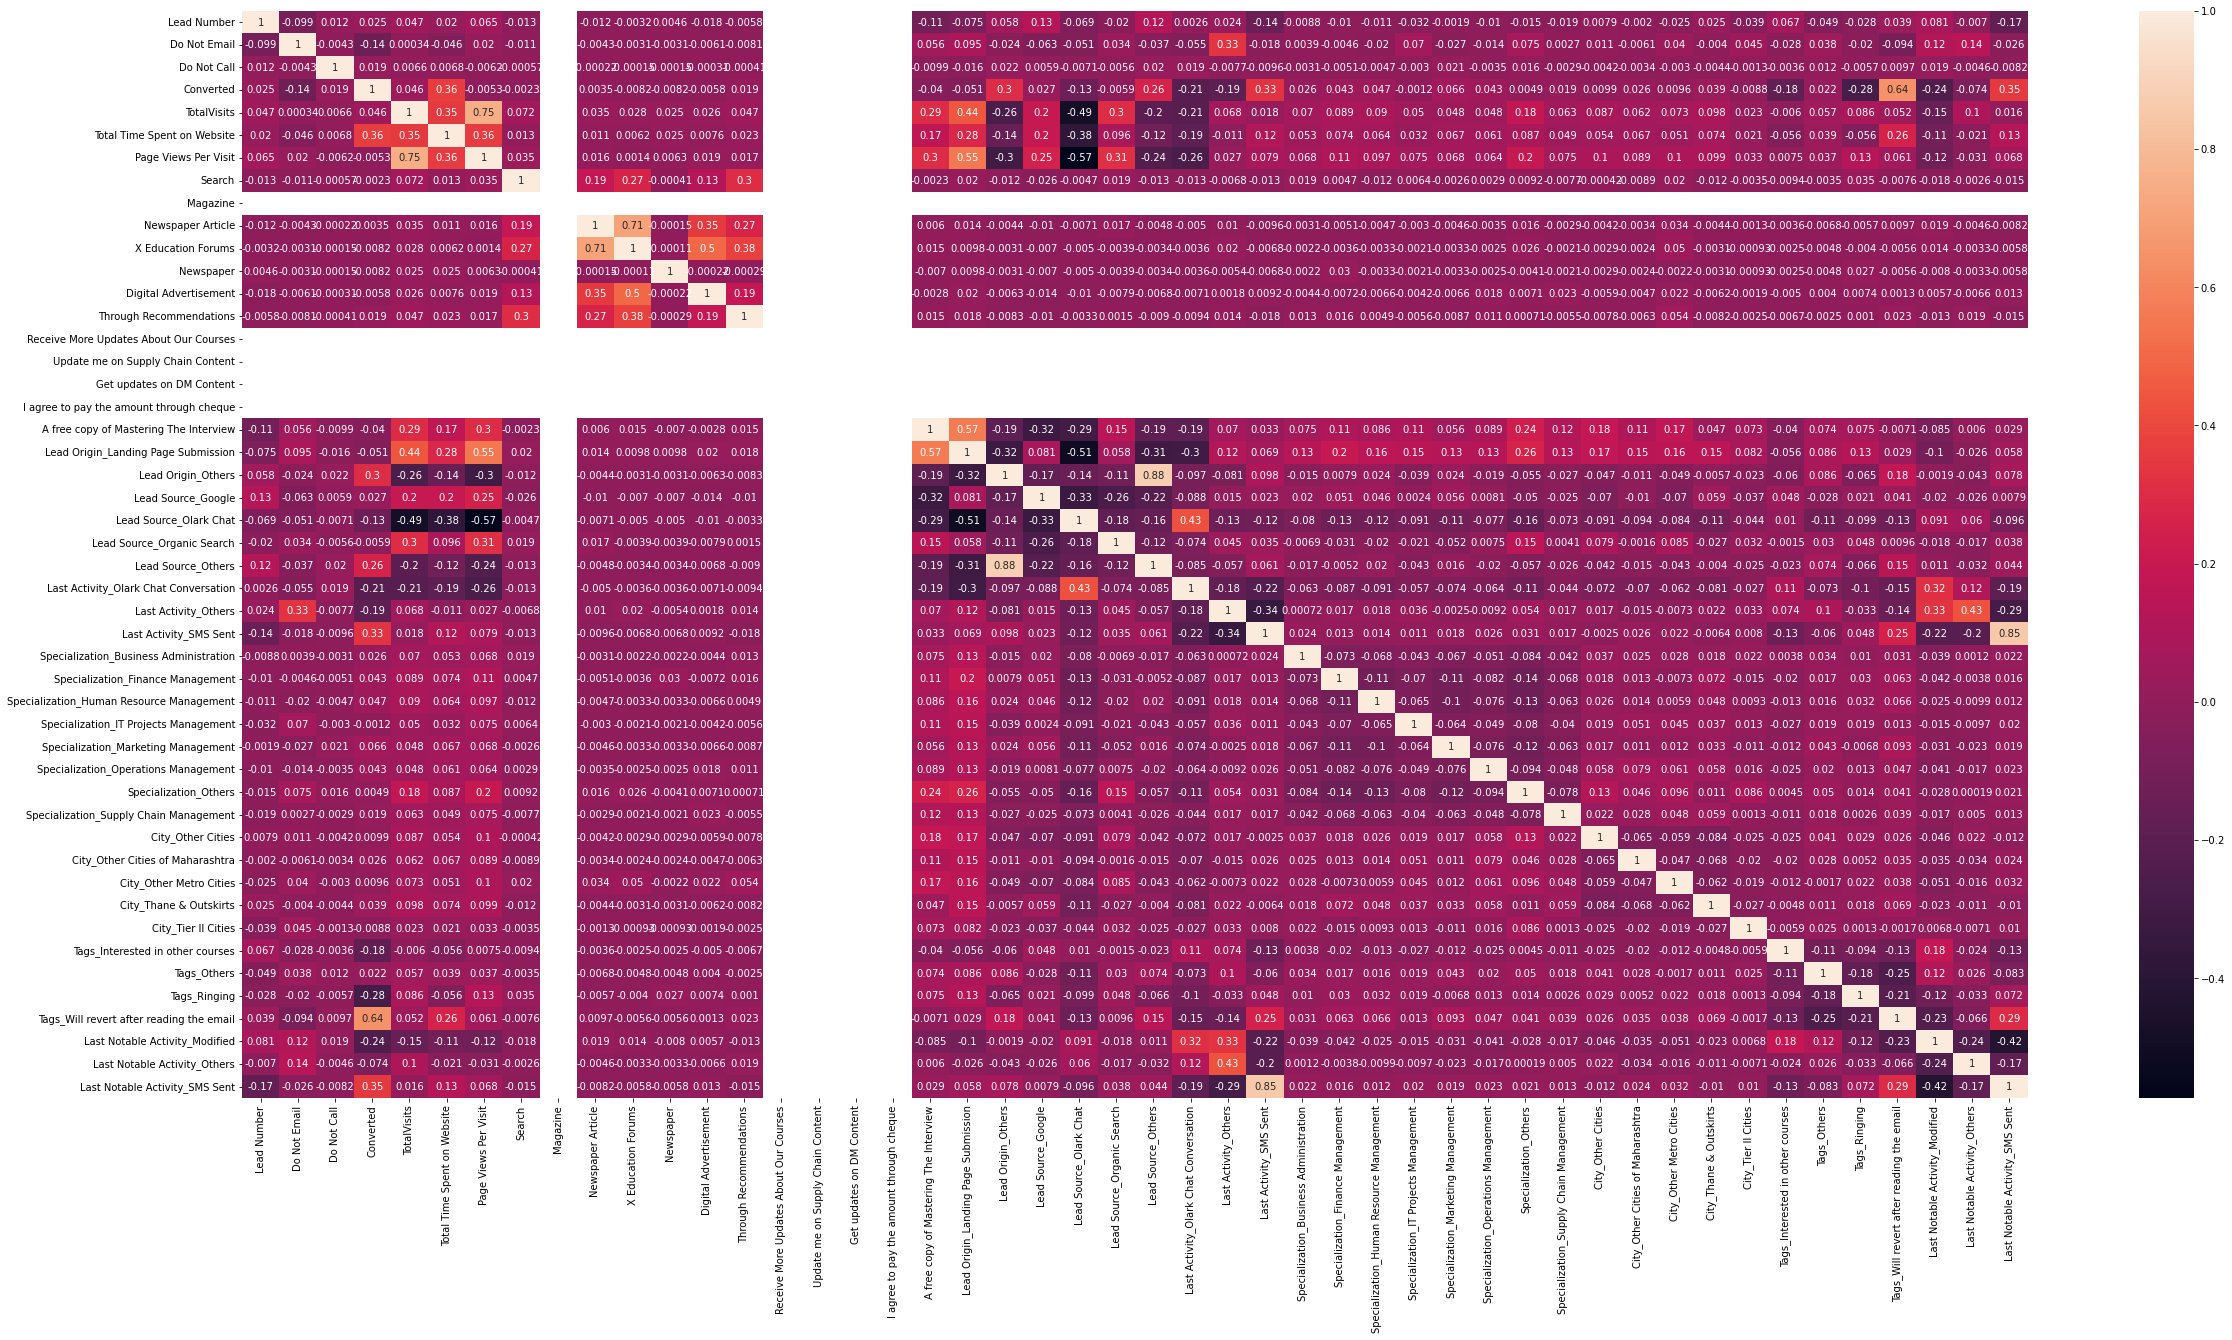

In [42]:
plt.figure(figsize = (40,20))        
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [43]:
leads = leads.drop(['Page Views Per Visit','X Education Forums','Tags_Will revert after reading the email','Lead Origin_Others','Last Activity_SMS Sent'], 1)

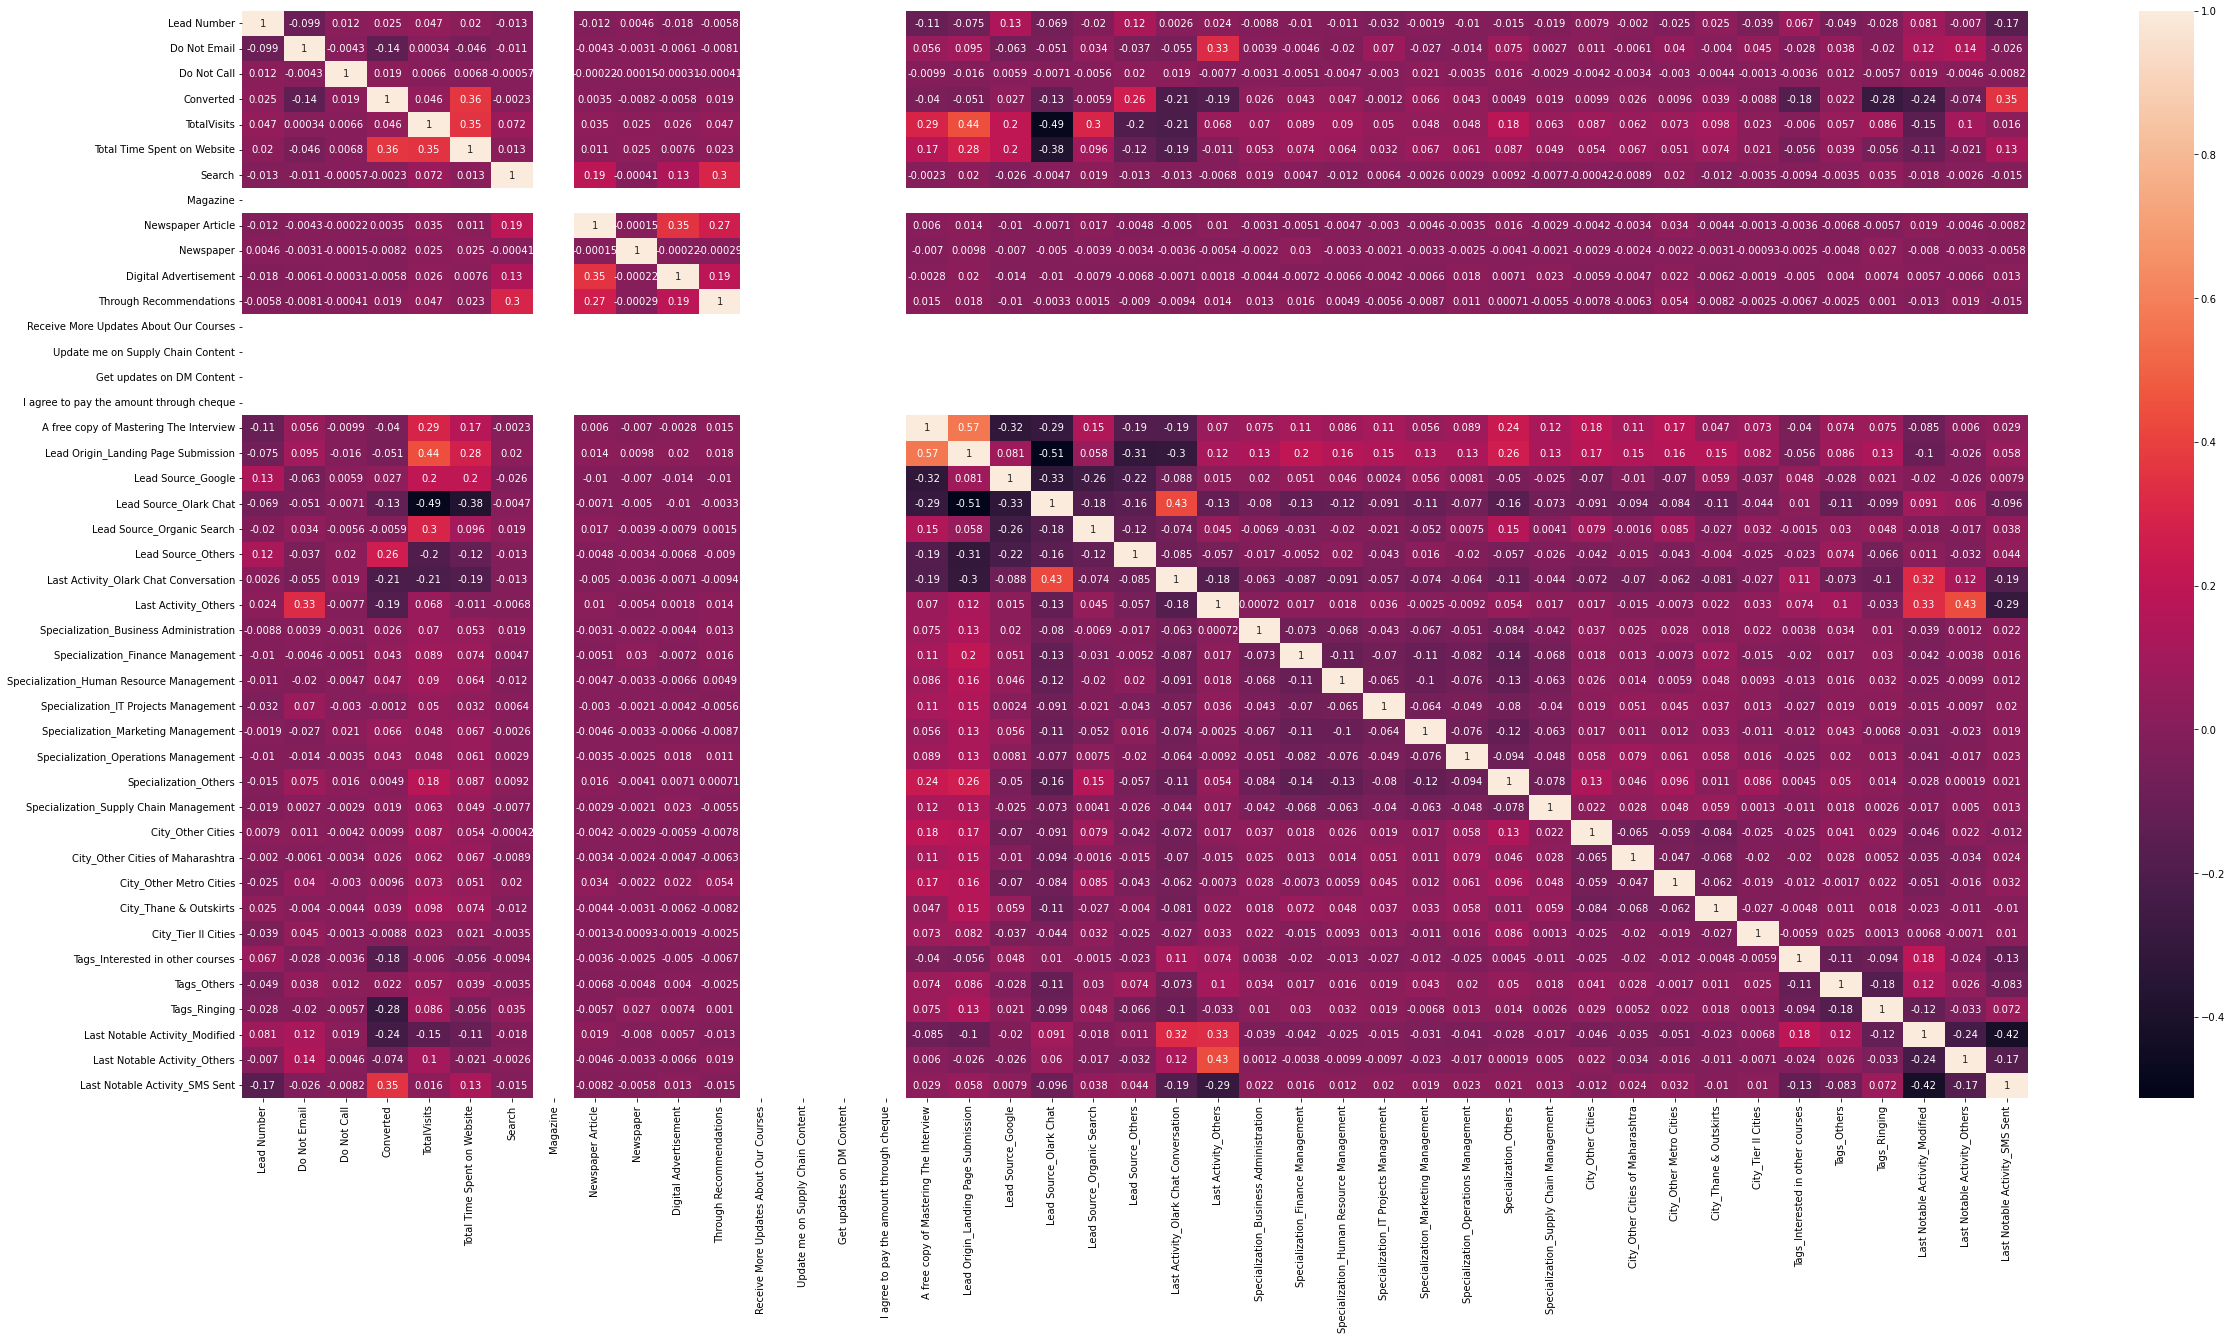

In [44]:
plt.figure(figsize = (40,20))
sns.heatmap(leads.corr(),annot = True)
plt.show()

## Test-Train Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Putting feature variable to X
X = leads.drop(['Converted','Prospect ID'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,Newspaper,Digital Advertisement,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,660728,0,0,5.0,674,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660727,0,0,2.0,1532,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,660681,0,0,2.0,1428,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Feature Scaling

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,Newspaper,Digital Advertisement,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
1871,641410,0,0,-1.122305,-0.885371,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6795,597687,0,0,0.275215,0.005716,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,0.624595,-0.691418,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,587928,0,0,0.624595,1.365219,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3934,622366,0,0,-1.122305,-0.885371,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

## Model Building

### Model-1

In [52]:
import statsmodels.api as sm

In [53]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2385.7
Date:                Tue, 13 Sep 2022   Deviance:                       4771.5
Time:                        16:18:30   Pearson chi2:                 1.07e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6459      1.018     -2.598      0.009      -4.642      -0.650
Lead Number                               3.044e-06   1.63e-06      1.869      0.062   -1.49e-07    6.24e-06
Do Not Email                                -1.1915      0.170     -7.006      0.000      -1.525      -0.858
Do Not Call                                 22.1227   2.93e+04      0.001      0.999   -5.73e+04    5.74e+04
TotalVisits                                  0.0539      0.047      1.147      0.251      -0.038       0.146
Total Time Spent on Website                  1.0552      0.043     24.295      0.000       0.970       1.140
Search                                       1.2465      1.020      1.222      0.222      -0.752       3.245
Magazine                                 -4.063e-09   3.38e-06     -0.001      0.999   -6.63e-06    6.62e-06
Newspaper Article                           21.4341   1.83e+04      0.001      0.999   -3.59e+04    3.59e+04
Newspaper                                  -20.3917   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Digital Advertisement                      -45.5388   2.59e+04     -0.002      0.999   -5.08e+04    5.08e+04
Through Recommendations                      3.2283      1.673      1.930      0.054      -0.050       6.506
Receive More Updates About Our Courses    6.982e-10   1.61e-06      0.000      1.000   -3.16e-06    3.16e-06
Update me on Supply Chain Content         1.612e-09    2.9e-06      0.001      1.000   -5.69e-06    5.69e-06
Get updates on DM Content                -1.187e-09   1.35e-06     -0.001      0.999   -2.65e-06    2.64e-06
I agree to pay the amount through cheque  2.289e-09   2.91e-06      0.001      0.999   -5.71e-06    5.71e-06
A free copy of Mastering The Interview      -0.2314      0.116     -2.002      0.045      -0.458      -0.005
Lead Origin_Landing Page Submission         -1.0848      0.135     -8.054      0.000      -1.349      -0.821
Lead Source_Google                           0.1682      0.123      1.366      0.172      -0.073       0.410
Lead Source_Olark Chat                       0.7424      0.167      4.448      0.000       0.415       1.069
Lead Source_Organic Search                   0.0948      0.140      0.679      0.497      -0.179       0.368
Lead Source_Others                           2.5090      0.187     13.429      0.000       2.143       2.875
Last Activity_Olark Chat Conversation       -1.7944      0.195     -9.206      0.000      -2.176      -1.412
Last Activity_Others                        -0.8835      0.140     -6.332      0.000      -1.157      -0.610
Specialization_Business Administration       1.1953      0.203      5.896      0.000       0.798       1.593
Specialization_Finance Manageme

## Feature Selection using RFE

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([ True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 21),
 ('Magazine', False, 24),
 ('Newspaper Article', False, 23),
 ('Newspaper', False, 22),
 ('Digital Advertisement', False, 19),
 ('Through Recommendations', False, 18),
 ('Receive More Updates About Our Courses', False, 25),
 ('Update me on Supply Chain Content', False, 26),
 ('Get updates on DM Content', False, 27),
 ('I agree to pay the amount through cheque', False, 28),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_Finance Management', False,

In [58]:
col = X_train.columns[rfe.support_]

In [59]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'Tags_Others'],
      dtype='object')

### Model-2

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.1
Date:                Tue, 13 Sep 2022   Deviance:                       4952.1
Time:                        16:18:35   Pearson chi2:                 9.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.7937      0.990     -2.821      0.005      -4.735      -0.853
Lead Number                             3.946e-06   1.58e-06      2.497      0.013    8.49e-07    7.04e-06
Do Not Email                              -1.2345      0.166     -7.436      0.000      -1.560      -0.909
TotalVisits                                0.0789      0.044      1.782      0.075      -0.008       0.166
Total Time Spent on Website                1.0792      0.043     25.254      0.000       0.995       1.163
A free copy of Mastering The Interview    -0.1684      0.093     -1.807      0.071      -0.351       0.014
Lead Origin_Landing Page Submission       -0.3371      0.105     -3.198      0.001      -0.544      -0.130
Lead Source_Olark Chat                     0.5877      0.132      4.466      0.000       0.330       0.846
Lead Source_Others                         2.5662      0.152     16.898      0.000       2.269       2.864
Last Activity_Olark Chat Conversation     -1.7924      0.188     -9.512      0.000      -2.162      -1.423
Last Activity_Others                      -0.8472      0.137     -6.170      0.000      -1.116      -0.578
Tags_Interested in other courses          -3.5229      0.364     -9.684      0.000      -4.236      -2.810
Tags_Ringing                              -4.3709      0.226    -19.340      0.000      -4.814      -3.928
Last Notable Activity_Modified            -0.1734      0.105     -1.652      0.099      -0.379       0.032
Last Notable Activity_Others               0.5822      0.183      3.174      0.002       0.223       0.942
Last Notable Activity_SMS Sent             1.9121      0.101     18.855      0.000       1.713       2.111
==========================================================================================================
"""

In [61]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.006121
6795    0.286424
3516    0.008160
8105    0.148422
3934    0.275362
4844    0.962115
3297    0.002806
8071    0.686620
987     0.870794
7423    0.972928
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00612053, 0.28642411, 0.00816   , 0.14842153, 0.27536164,
       0.96211512, 0.00280551, 0.68661951, 0.87079355, 0.9729278 ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [63]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.006121,1871
1,0,0.286424,6795
2,0,0.008160,3516
3,0,0.148422,8105
4,0,0.275362,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [64]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.006121,1871,0
1,0,0.286424,6795,0
2,0,0.008160,3516,0
3,0,0.148422,8105,0
4,0,0.275362,3934,0


In [65]:
from sklearn import metrics

In [66]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3533  469]
 [ 572 1894]]


In [67]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8390538033395176


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

####  Checking VIFs

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,7.72
5,Lead Origin_Landing Page Submission,4.71
12,Last Notable Activity_Modified,3.98
9,Last Activity_Others,3.17
6,Lead Source_Olark Chat,2.69
13,Last Notable Activity_Others,2.43
4,A free copy of Mastering The Interview,2.14
8,Last Activity_Olark Chat Conversation,2.07
14,Last Notable Activity_SMS Sent,1.79
7,Lead Source_Others,1.60


In [70]:
col = col.drop('Lead Number', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model-3

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2479.2
Date:                Tue, 13 Sep 2022   Deviance:                       4958.4
Time:                        16:18:43   Pearson chi2:                 9.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3321      0.093     -3.583      0.000      -0.514      -0.150
Do Not Email                              -1.2657      0.165     -7.651      0.000      -1.590      -0.941
TotalVisits                                0.0854      0.044      1.932      0.053      -0.001       0.172
Total Time Spent on Website                1.0804      0.043     25.287      0.000       0.997       1.164
A free copy of Mastering The Interview    -0.1869      0.093     -2.013      0.044      -0.369      -0.005
Lead Origin_Landing Page Submission       -0.3455      0.105     -3.279      0.001      -0.552      -0.139
Lead Source_Olark Chat                     0.5628      0.131      4.296      0.000       0.306       0.820
Lead Source_Others                         2.5951      0.151     17.153      0.000       2.299       2.892
Last Activity_Olark Chat Conversation     -1.7911      0.188     -9.514      0.000      -2.160      -1.422
Last Activity_Others                      -0.8478      0.137     -6.181      0.000      -1.117      -0.579
Tags_Interested in other courses          -3.4835      0.362     -9.618      0.000      -4.193      -2.774
Tags_Ringing                              -4.4000      0.226    -19.449      0.000      -4.843      -3.957
Last Notable Activity_Modified            -0.1761      0.105     -1.679      0.093      -0.382       0.029
Last Notable Activity_Others               0.5791      0.183      3.161      0.002       0.220       0.938
Last Notable Activity_SMS Sent             1.8747      0.100     18.723      0.000       1.678       2.071
==========================================================================================================
"""

In [72]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [73]:
y_train_pred[:10]

array([0.00536884, 0.30262322, 0.00766802, 0.15782088, 0.26935347,
       0.96206967, 0.00262505, 0.72118242, 0.86149   , 0.97514719])

In [74]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [75]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.005369,1871,0
1,0,0.302623,6795,0
2,0,0.007668,3516,0
3,0,0.157821,8105,0
4,0,0.269353,3934,0


In [76]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8378169449598021


In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,3.45
8,Last Activity_Others,3.17
4,Lead Origin_Landing Page Submission,3.13
12,Last Notable Activity_Others,2.32
3,A free copy of Mastering The Interview,2.14
7,Last Activity_Olark Chat Conversation,2.07
5,Lead Source_Olark Chat,1.95
1,TotalVisits,1.57
13,Last Notable Activity_SMS Sent,1.50
2,Total Time Spent on Website,1.27


In [78]:
col = col.drop('Last Notable Activity_Modified', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model-4

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.6
Date:                Tue, 13 Sep 2022   Deviance:                       4961.2
Time:                        16:18:48   Pearson chi2:                 9.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3860      0.087     -4.434      0.000      -0.557      -0.215
Do Not Email                              -1.2801      0.165     -7.758      0.000      -1.604      -0.957
TotalVisits                                0.0883      0.044      1.999      0.046       0.002       0.175
Total Time Spent on Website                1.0791      0.043     25.272      0.000       0.995       1.163
A free copy of Mastering The Interview    -0.1817      0.093     -1.960      0.050      -0.364    2.94e-05
Lead Origin_Landing Page Submission       -0.3474      0.105     -3.297      0.001      -0.554      -0.141
Lead Source_Olark Chat                     0.5675      0.131      4.335      0.000       0.311       0.824
Lead Source_Others                         2.5765      0.151     17.099      0.000       2.281       2.872
Last Activity_Olark Chat Conversation     -1.9133      0.173    -11.033      0.000      -2.253      -1.573
Last Activity_Others                      -0.9662      0.117     -8.228      0.000      -1.196      -0.736
Tags_Interested in other courses          -3.5143      0.362     -9.705      0.000      -4.224      -2.805
Tags_Ringing                              -4.3969      0.226    -19.423      0.000      -4.841      -3.953
Last Notable Activity_Others               0.7525      0.151      4.973      0.000       0.456       1.049
Last Notable Activity_SMS Sent             1.9292      0.095     20.336      0.000       1.743       2.115
==========================================================================================================
"""

In [80]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [81]:
y_train_pred[:10]

array([0.00511826, 0.29222813, 0.00734536, 0.15805871, 0.29465319,
       0.96196188, 0.00251563, 0.7182296 , 0.85935057, 0.97509186])

In [82]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [83]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.005118,1871,0
1,0,0.292228,6795,0
2,0,0.007345,3516,0
3,0,0.158059,8105,0
4,0,0.294653,3934,0


In [84]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8367346938775511


In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,2.88
3,A free copy of Mastering The Interview,2.14
8,Last Activity_Others,1.94
5,Lead Source_Olark Chat,1.84
1,TotalVisits,1.57
11,Last Notable Activity_Others,1.49
7,Last Activity_Olark Chat Conversation,1.46
12,Last Notable Activity_SMS Sent,1.40
2,Total Time Spent on Website,1.26
0,Do Not Email,1.24


In [86]:
col = col.drop('A free copy of Mastering The Interview', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model-5

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2482.5
Date:                Tue, 13 Sep 2022   Deviance:                       4965.0
Time:                        16:18:52   Pearson chi2:                 9.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3932      0.087     -4.521      0.000      -0.564      -0.223
Do Not Email                             -1.2794      0.165     -7.768      0.000      -1.602      -0.957
TotalVisits                               0.0844      0.044      1.915      0.055      -0.002       0.171
Total Time Spent on Website               1.0785      0.043     25.270      0.000       0.995       1.162
Lead Origin_Landing Page Submission      -0.4379      0.095     -4.620      0.000      -0.624      -0.252
Lead Source_Olark Chat                    0.5645      0.131      4.310      0.000       0.308       0.821
Lead Source_Others                        2.5790      0.151     17.103      0.000       2.283       2.875
Last Activity_Olark Chat Conversation    -1.9112      0.174    -11.010      0.000      -2.251      -1.571
Last Activity_Others                     -0.9673      0.117     -8.244      0.000      -1.197      -0.737
Tags_Interested in other courses         -3.5157      0.362     -9.701      0.000      -4.226      -2.805
Tags_Ringing                             -4.3963      0.226    -19.421      0.000      -4.840      -3.953
Last Notable Activity_Others              0.7502      0.151      4.961      0.000       0.454       1.047
Last Notable Activity_SMS Sent            1.9263      0.095     20.333      0.000       1.741       2.112
=========================================================================================================
"""

In [88]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [89]:
y_train_pred[:10]

array([0.00509438, 0.30965641, 0.00726144, 0.14479095, 0.2935448 ,
       0.95801177, 0.00272434, 0.7171361 , 0.85895793, 0.97482173])

In [90]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [91]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.005094,1871,0
1,0,0.309656,6795,0
2,0,0.007261,3516,0
3,0,0.144791,8105,0
4,0,0.293545,3934,0


In [92]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8373531230674088


In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Others,1.94
3,Lead Origin_Landing Page Submission,1.85
4,Lead Source_Olark Chat,1.84
1,TotalVisits,1.56
10,Last Notable Activity_Others,1.49
6,Last Activity_Olark Chat Conversation,1.46
11,Last Notable Activity_SMS Sent,1.40
2,Total Time Spent on Website,1.26
0,Do Not Email,1.24
9,Tags_Ringing,1.19


In [94]:
col = col.drop('TotalVisits', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model-6

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2484.3
Date:                Tue, 13 Sep 2022   Deviance:                       4968.7
Time:                        16:18:56   Pearson chi2:                 9.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3830      0.087     -4.412      0.000      -0.553      -0.213
Do Not Email                             -1.2886      0.164     -7.837      0.000      -1.611      -0.966
Total Time Spent on Website               1.0886      0.042     25.680      0.000       1.006       1.172
Lead Origin_Landing Page Submission      -0.4119      0.094     -4.393      0.000      -0.596      -0.228
Lead Source_Olark Chat                    0.4771      0.122      3.899      0.000       0.237       0.717
Lead Source_Others                        2.5183      0.147     17.109      0.000       2.230       2.807
Last Activity_Olark Chat Conversation    -1.9169      0.173    -11.062      0.000      -2.256      -1.577
Last Activity_Others                     -0.9815      0.117     -8.399      0.000      -1.211      -0.753
Tags_Interested in other courses         -3.4929      0.362     -9.657      0.000      -4.202      -2.784
Tags_Ringing                             -4.3959      0.227    -19.397      0.000      -4.840      -3.952
Last Notable Activity_Others              0.8011      0.149      5.394      0.000       0.510       1.092
Last Notable Activity_SMS Sent            1.9191      0.095     20.276      0.000       1.734       2.105
=========================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.00513942, 0.31244261, 0.00633997, 0.14361699, 0.29530891,
       0.95899344, 0.00250892, 0.70457042, 0.85976217, 0.97553069])

In [98]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [99]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.005139,1871,0
1,0,0.312443,6795,0
2,0,0.006340,3516,0
3,0,0.143617,8105,0
4,0,0.295309,3934,0


In [100]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8371985157699443


In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Others,1.93
2,Lead Origin_Landing Page Submission,1.72
3,Lead Source_Olark Chat,1.59
5,Last Activity_Olark Chat Conversation,1.46
9,Last Notable Activity_Others,1.44
10,Last Notable Activity_SMS Sent,1.40
0,Do Not Email,1.24
1,Total Time Spent on Website,1.23
8,Tags_Ringing,1.19
4,Lead Source_Others,1.10


In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3529,  473],
       [ 580, 1886]], dtype=int64)

In [103]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8371985157699443

### Metrics beyond accuracy

In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.764801297648013

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.8818090954522738

In [107]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11819090454772614


In [108]:
# positive predictive value
print (TP / float(TP+FP))

0.7994913098770665


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8588464346556339


## Plotting ROC Curve

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

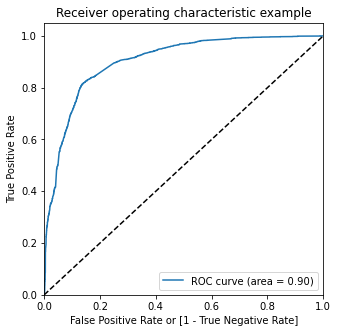

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cut-off

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005139,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.312443,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.006340,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.143617,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.295309,3934,0,1,1,1,0,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.663729  0.973236  0.473013
0.2   0.2  0.746599  0.934307  0.630935
0.3   0.3  0.827922  0.845093  0.817341
0.4   0.4  0.844465  0.813463  0.863568
0.5   0.5  0.837199  0.764801  0.881809
0.6   0.6  0.826376  0.698297  0.905297
0.7   0.7  0.803958  0.592052  0.934533
0.8   0.8  0.745053  0.384428  0.967266
0.9   0.9  0.714286  0.268856  0.988756


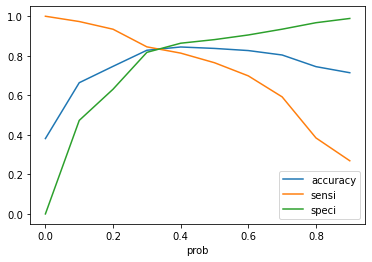

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005139,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.312443,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.006340,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.143617,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.295309,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [117]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8398268398268398

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3387,  615],
       [ 421, 2045]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Sensitivity
TP / float(TP+FN)

0.8292781832927818

In [121]:
# Specificity
TN / float(TN+FP)

0.8463268365817092

In [122]:
# False Positive Rate
print(FP/ float(TN+FP))

0.15367316341829085


In [123]:
# Positive predictive value 
print (TP / float(TP+FP))

0.768796992481203


In [124]:
# Negative predictive value 
print (TN / float(TN+ FN))

0.8894432773109243


### Precision and Recall

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3529,  473],
       [ 580, 1886]], dtype=int64)

In [126]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7994913098770665

In [127]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.764801297648013

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

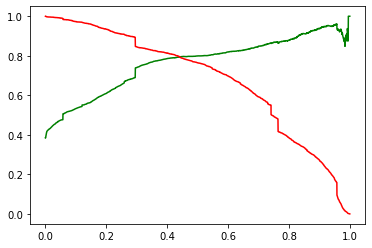

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From above curve, another optimal cut-off is 0.42

## Making predictions using test set

In [132]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Tags_Interested in other courses,Tags_Ringing,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4269,0,0.964504,0,0,0,0,0,0,0,0,1
2376,0,-0.885371,0,0,1,0,0,0,0,0,1
7766,0,-0.777416,0,0,0,0,1,0,0,1,0
9199,0,-0.885371,0,1,0,1,0,0,0,0,0
4359,0,-0.885371,0,0,1,0,0,0,0,0,0


In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

4269    0.929957
2376    0.956502
7766    0.196270
9199    0.058053
4359    0.763410
9186    0.798889
1631    0.564393
8963    0.307242
8007    0.113537
5324    0.617519
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
y_pred_1.head()

,0
4269,0.929957
2376,0.956502
7766,0.196270
9199,0.058053
4359,0.763410


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.929957
1,1,2376,0.956502
2,1,7766,0.196270
3,0,9199,0.058053
4,1,4359,0.763410


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [145]:
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,1,4269,0.929957
1,1,2376,0.956502
2,1,7766,0.196270
3,0,9199,0.058053
4,1,4359,0.763410


In [146]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [147]:
y_pred_final.head()

,Converted,CustID,Converted_Prob,final_predicted
0,1,4269,0.929957,1
1,1,2376,0.956502,1
2,1,7766,0.196270,0
3,0,9199,0.058053,0
4,1,4359,0.763410,1


#### Metrics with 0.35 as the final optimal cut-off probability

In [148]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8358585858585859

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1410,  267],
       [ 188,  907]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Sensitivity
TP / float(TP+FN)

0.828310502283105

In [152]:
# Specificty
TN / float(TN+FP)

0.8407871198568873